# 2433 project_part III_ML
Name: **Chenyi Lyu**    NID: **N15220231**

Name: **Zoe Tan**    NID: **N15948322**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/project

/content/drive/.shortcut-targets-by-id/1B8E8s4QCs5YhRhjjzCsurI5DNfn-3Hfk/project


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

In [ ]:
df = pd.read_csv('heart_2020_cleaned.csv')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


**Column Descriptions**

* HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
* BMI: Body Mass Index (BMI).
* Smoking: Have you smoked at least 100 cigarettes in your entire life?
* AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week.
* Stroke: (Ever told) (you had) a stroke?
* PhysicalHealth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).
* MentalHealth: Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).
* DiffWalking: Do you have serious difficulty walking or climbing stairs?
* Sex: Are you male or female?
* AgeCategory: Fourteen-level age category. (then calculated the mean)
* Race: Imputed race/ethnicity value.
* Diabetic: (Ever told) (you had) diabetes?
* PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
* GenHealth: Would you say that in general your health is...
* SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
* Asthma: (Ever told) (you had) asthma?
* KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
* SkinCancer: (Ever told) (you had) skin cancer?

# EDA and Data Preproscessing

In [ ]:
df['AgeCategory'].value_counts(normalize=True) * 100

65-69          10.679029
60-64          10.533623
70-74           9.714036
55-59           9.305024
50-54           7.936960
80 or older     7.552651
45-49           6.814053
75-79           6.717428
18-24           6.586720
40-44           6.568583
35-39           6.425992
30-34           5.864069
25-29           5.301834
Name: AgeCategory, dtype: float64

AgeCategory shouldn't be a categorical variable. We will apply a function to calculate the mean age for each age category and make it a continuous feature.

In [ ]:
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
df_transformed = df.copy()
df_transformed['AgeCategory'] = df['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
df_transformed['AgeCategory'] = df_transformed['AgeCategory'].astype('float')

In [ ]:
df_transformed['HeartDisease'].value_counts(normalize=True) * 100

No     91.440454
Yes     8.559546
Name: HeartDisease, dtype: float64

The classes here are very imbalanced. We should consider resampling before applying any machine learning models on the dataset.

In [ ]:
print('Continuous Columns')
df_transformed.select_dtypes(include=['float']).describe().T[['min', 'mean', 'max']].style.background_gradient(cmap='Blues')

Continuous Columns


,min,mean,max
BMI,12.020000,28.325399,94.850000
PhysicalHealth,0.000000,3.371710,30.000000
MentalHealth,0.000000,3.898366,30.000000
AgeCategory,21.000000,54.355759,80.000000
SleepTime,1.000000,7.097075,24.000000


The range of continuous features are different. We consider applying min-max scaling to the continuous features.

In [ ]:
scaler = MinMaxScaler()
df_transformed[['BMI','PhysicalHealth','MentalHealth','AgeCategory','SleepTime']] = scaler.fit_transform(df_transformed[['BMI','PhysicalHealth','MentalHealth','AgeCategory','SleepTime']]) 
df_transformed

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,0.055294,Yes,No,No,0.100000,1.0,No,Female,0.610169,White,Yes,Yes,Very good,0.173913,Yes,No,Yes
1,No,0.100447,No,No,Yes,0.000000,0.0,No,Female,1.000000,White,No,Yes,Very good,0.260870,No,No,No
2,No,0.175782,Yes,No,No,0.666667,1.0,No,Male,0.779661,White,Yes,Yes,Fair,0.304348,Yes,No,No
3,No,0.147169,No,No,No,0.000000,0.0,No,Female,0.949153,White,No,No,Good,0.217391,No,No,Yes
4,No,0.141132,No,No,No,0.933333,0.0,Yes,Female,0.355932,White,No,Yes,Very good,0.304348,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,0.185802,Yes,No,No,0.233333,0.0,Yes,Male,0.694915,Hispanic,Yes,No,Fair,0.217391,Yes,No,No
319791,No,0.215139,Yes,No,No,0.000000,0.0,No,Male,0.271186,Hispanic,No,Yes,Very good,0.173913,Yes,No,No
319792,No,0.147531,No,No,No,0.000000,0.0,No,Female,0.440678,Hispanic,No,Yes,Good,0.217391,No,No,No
319793,No,0.250996,No,No,No,0.000000,0.0,No,Female,0.101695,Hispanic,No,No,Good,0.478261,No,No,No


In [ ]:
print('\nCategorical Columns\n')
df_transformed.select_dtypes(include=['O']).nunique()


Categorical Columns



HeartDisease        2
Smoking             2
AlcoholDrinking     2
Stroke              2
DiffWalking         2
Sex                 2
Race                6
Diabetic            4
PhysicalActivity    2
GenHealth           5
Asthma              2
KidneyDisease       2
SkinCancer          2
dtype: int64

Some categorical columns have 2 values, and some have more than 2 values. 
We will convert the columns with 2 unique values to binary (either 1 or 0) and one-hot encode the columns with more than 2 unique values.

In [ ]:
# Binary encode columns with 2 unique values
for col in ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']:
    le = LabelEncoder()
    df_transformed[col] = le.fit_transform(df_transformed[col])
# One-hot encode columns with more than 2 unique values
df_transformed = pd.get_dummies(df_transformed, columns=['Race', 'Diabetic', 'GenHealth', ], prefix = ['Race', 'Diabetic', 'GenHealth'])
df_transformed

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,0.055294,1,0,0,0.100000,1.0,0,0,0.610169,...,1,0,0,1,0,0,0,0,0,1
1,0,0.100447,0,0,1,0.000000,0.0,0,0,1.000000,...,1,1,0,0,0,0,0,0,0,1
2,0,0.175782,1,0,0,0.666667,1.0,0,1,0.779661,...,1,0,0,1,0,0,1,0,0,0
3,0,0.147169,0,0,0,0.000000,0.0,0,0,0.949153,...,1,1,0,0,0,0,0,1,0,0
4,0,0.141132,0,0,0,0.933333,0.0,1,0,0.355932,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,0.185802,1,0,0,0.233333,0.0,1,1,0.694915,...,0,0,0,1,0,0,1,0,0,0
319791,0,0.215139,1,0,0,0.000000,0.0,0,1,0.271186,...,0,1,0,0,0,0,0,0,0,1
319792,0,0.147531,0,0,0,0.000000,0.0,0,0,0.440678,...,0,1,0,0,0,0,0,1,0,0
319793,0,0.250996,0,0,0,0.000000,0.0,0,0,0.101695,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
df_transformed.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Race_American Indian/Alaskan Native', 'Race_Asian',
       'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White',
       'Diabetic_No', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'GenHealth_Excellent',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good'],
      dtype='object')

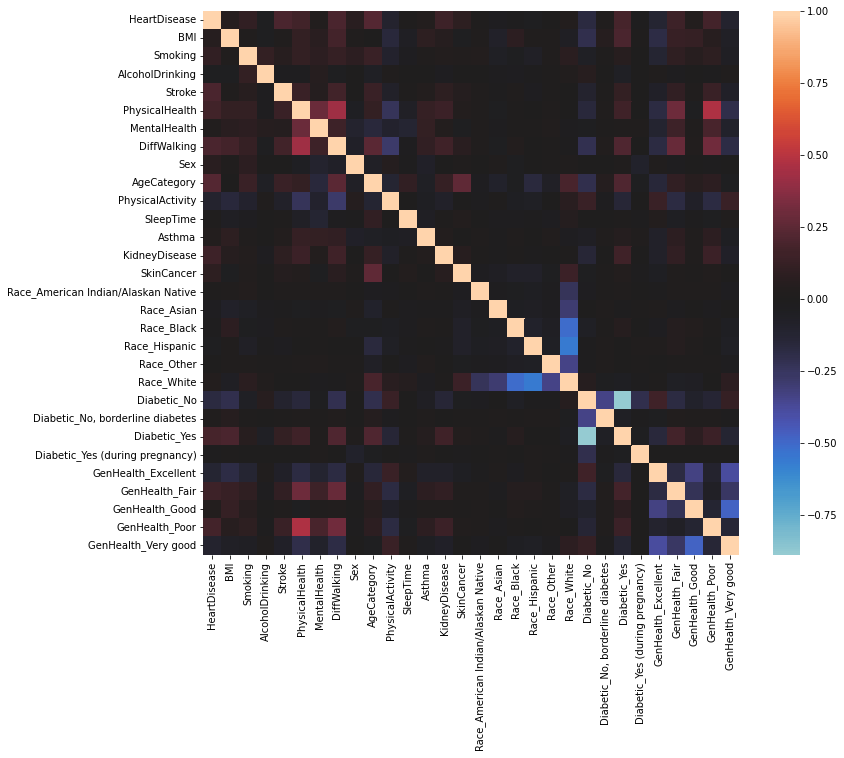

In [ ]:
plt.figure(figsize = (12,10))
sns.heatmap(df_transformed.corr(),center=0)
plt.show()

In [ ]:
correlation = df_transformed.corr()
correlation['HeartDisease']

HeartDisease                           1.000000
BMI                                    0.051803
Smoking                                0.107764
AlcoholDrinking                       -0.032080
Stroke                                 0.196835
PhysicalHealth                         0.170721
MentalHealth                           0.028591
DiffWalking                            0.201258
Sex                                    0.070040
AgeCategory                            0.231583
PhysicalActivity                      -0.100030
SleepTime                              0.008327
Asthma                                 0.041444
KidneyDisease                          0.145197
SkinCancer                             0.093317
Race_American Indian/Alaskan Native    0.008547
Race_Asian                            -0.030262
Race_Black                            -0.010156
Race_Hispanic                         -0.036163
Race_Other                            -0.003039
Race_White                             0

Although a lot of features do not have a high correlation with our target HeartDisease, we decide not to perform feature selection here since we want our Random Foreset Classifier uses as much features as possible and let the model decide which features are important.

In [ ]:
# Train-test split
train, test = train_test_split(df_transformed, test_size=0.2, random_state=0)

In [ ]:
# Resampling on training data
class_0 = train[train['HeartDisease'] == 0]
class_1 = train[train['HeartDisease'] == 1]

class_1 = class_1.sample(len(class_0),replace=True)
train = pd.concat([class_0, class_1], axis=0)
print('Data in Train:')
print(train['HeartDisease'].value_counts())

Data in Train:
0    233910
1    233910
Name: HeartDisease, dtype: int64


In [ ]:
X_train = train.drop(columns=['HeartDisease'])
y_train = train['HeartDisease']
X_test = test.drop(columns=['HeartDisease'])
y_test = test['HeartDisease']

# Model and Discussion

In [ ]:
rf = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     58512
           1       0.30      0.22      0.25      5447

    accuracy                           0.89     63959
   macro avg       0.62      0.59      0.60     63959
weighted avg       0.88      0.89      0.88     63959



To understand which features contribute to the prediction of heart desease, we would like to look at the random forest feature score.

Text(0.5, 0, 'Random Forest Feature Importance')

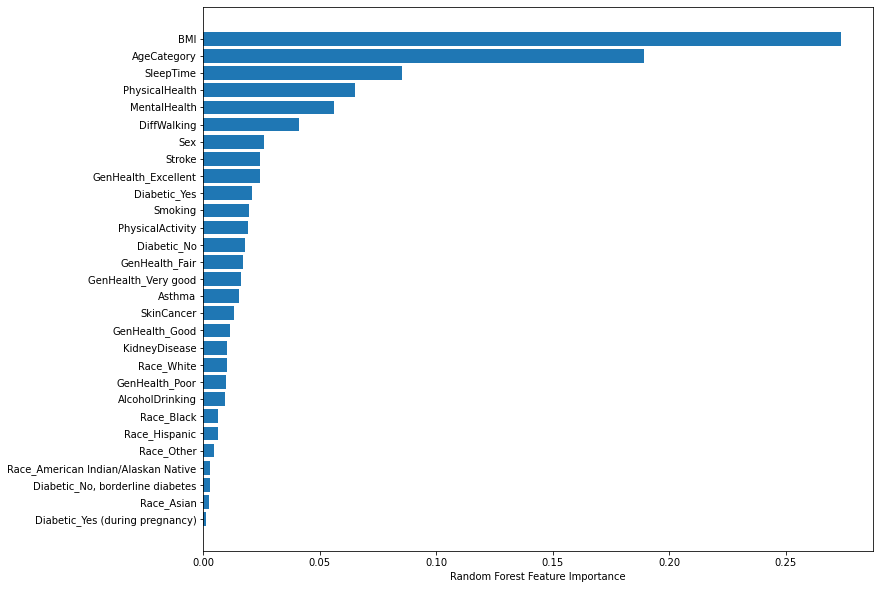

In [ ]:
sorted_idx = rf.feature_importances_.argsort()
plt.figure(figsize=(12,10)) 
plt.barh(X_train.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

We can see that BMI and Age are important features when predicting heart disease. Sleep time also seems to be relatively important. So we would like to investigate BMI, Age, and sleep time in more detail.

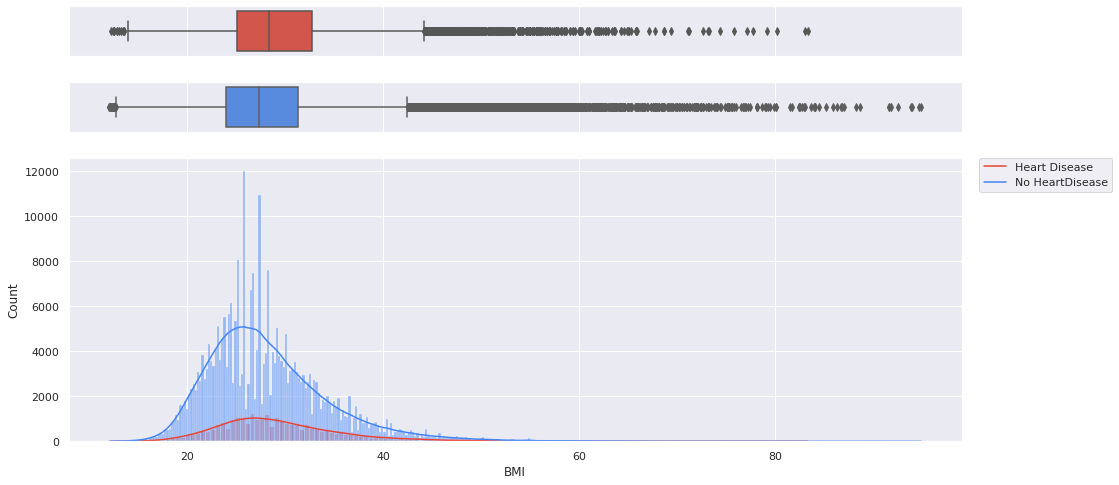

In [ ]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})
 
# creating a figure composed of 3 matplotlib.Axes objects
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})
colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
# assigning a graph to each ax
sns.boxplot(x=df[df['HeartDisease']=='Yes']["BMI"], ax=ax_box1, color="#ea4335")
sns.histplot(df[df['HeartDisease']=='Yes'], x="BMI", ax=ax_hist, kde=True, color="#ea4335")

sns.boxplot(x=df[df['HeartDisease']=='No']["BMI"], ax=ax_box2, color='#4285f4')
sns.histplot(df[df['HeartDisease']=='No'], x="BMI", ax=ax_hist, kde=True, color='#4285f4')
 
# Remove x axis name for the boxplots
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

plt.legend(title='', loc=2, labels=['Heart Disease', 'No HeartDisease'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

People with heart disease have a higher BMI than people with no heart disease. This aligns to our insight from Random Forest feature scores. So we can conclude that BMI is an important feature in predicting heart disease.

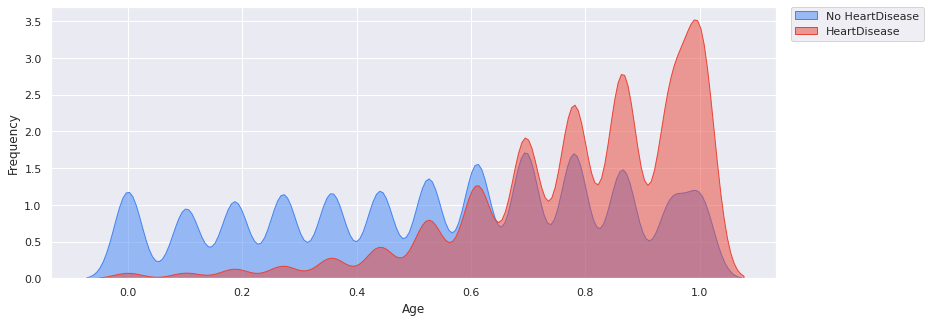

In [ ]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df_transformed[df_transformed["HeartDisease"]==0]["AgeCategory"], alpha=0.5,shade = True, color="#4285f4", label="No HeartDisease", ax = ax)
sns.kdeplot(df_transformed[df_transformed["HeartDisease"]==1]["AgeCategory"], alpha=0.5,shade = True, color="#ea4335", label="HeartDisease", ax = ax)
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

People found to have heart disease are mostly old people. This also aligns to our insight from Random Forest feature scores. So we can conclude that age is an important feature in predicting heart disease.

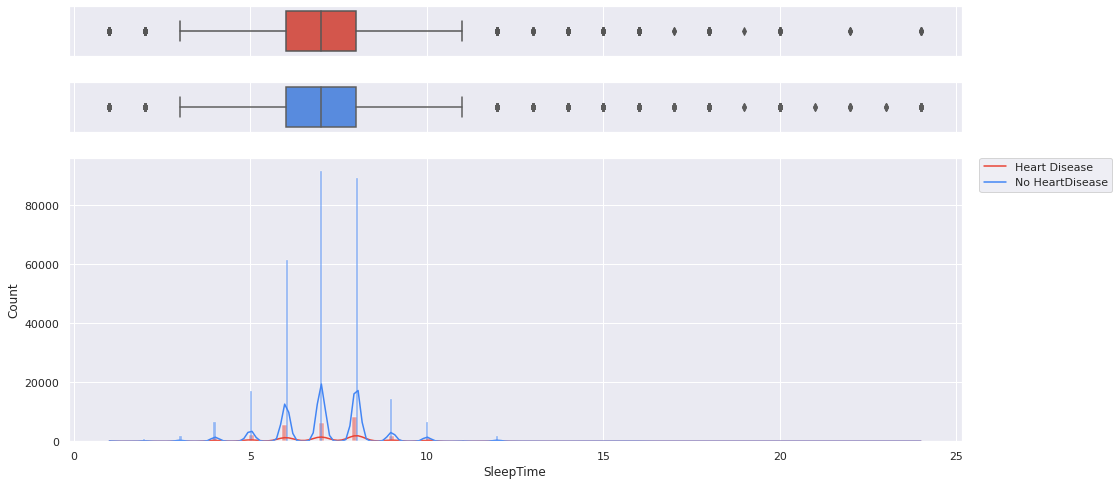

In [ ]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})
 
# creating a figure composed of 3 matplotlib.Axes objects
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})
colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
# assigning a graph to each ax
sns.boxplot(x=df[df['HeartDisease']=='Yes']["SleepTime"], ax=ax_box1, color="#ea4335")
sns.histplot(df[df['HeartDisease']=='Yes'], x="SleepTime", ax=ax_hist, kde=True, color="#ea4335")

sns.boxplot(x=df[df['HeartDisease']=='No']["SleepTime"], ax=ax_box2, color='#4285f4')
sns.histplot(df[df['HeartDisease']=='No'], x="SleepTime", ax=ax_hist, kde=True, color='#4285f4')
 
# Remove x axis name for the boxplots
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

plt.legend(title='', loc=2, labels=['Heart Disease', 'No HeartDisease'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

There is no significant pattern in the sleep time of people with and without heart disease. 

# Conclusion

When designing and implementing insurance products, it is worth keeping track of insurer's demographic information such as age and health measurements such as BMI. This also reminds us of the importance of collecting and storing multi-resourced data in our Big Data platform in order to drive more tangible business decisions.

# Reference
https://www.kaggle.com/code/mushfirat/heartdisease-eda-prediction#1-